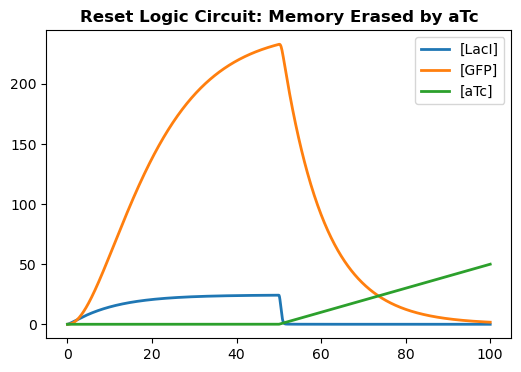

In [7]:
import tellurium as te

model = te.loada("""
model reset_logic
IPTG = 1; // Turns on LacI
LacI = 0; // Memory Protein
GFP = 0; // Output
aTc = 0; // Reset signal

// Parameters
k_on = 1; // IPTG triggers LacI prodution
k_feedback = 1.5; // LacI amplifies itself
k_deg_LacI = 0.1; // degradation of LacI
k_prod_GFP = 1; // GFP formed when LacI active
k_deg_GFP = 0.1; // degredation of GFP
k_reset = 5; // aTc resets LacI
                 
// Reactions
J0: -> LacI; k_on*IPTG + (k_feedback*LacI)/(1+LacI) // Activation and feedback loop
J1: LacI -> ; k_deg_LacI*LacI // LacI degradation
J2: -> GFP; k_prod_GFP*LacI // GFP from LacI
J3: GFP -> ; k_deg_GFP*GFP // GFP degradation
J4: -> aTc; (time > 50) // aTc enters at t=50
J5: LacI -> ; k_reset*aTc*LacI // aTc removes LacI
end
""")

model.simulate(0, 100, 1000)
model.plot(title="Reset Logic Circuit: Memory Erased by aTc")